<a href="https://colab.research.google.com/github/mchandler-CPT/mscai-eportfolio/blob/main/UNIT06_SEMINAR06_K_Means_Clustering_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mounting Google Drive...
Mounted at /content/drive

--- Task A: K-Means Clustering on Iris Dataset ---

Loading data from: /content/drive/My Drive/Unit06 iris.csv
Iris dataset loaded successfully!
   sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

Data pre-processed and scaled.

K-Means clustering complete (K=3).

Adjusted Rand Score (ARI) for K=3: 0.620

Crosstab of True Species vs. K-Means Clusters:
col_0        0   1   2
species               
setosa       0  50   0
versicolor  39   0  11
virginica   14   0  36


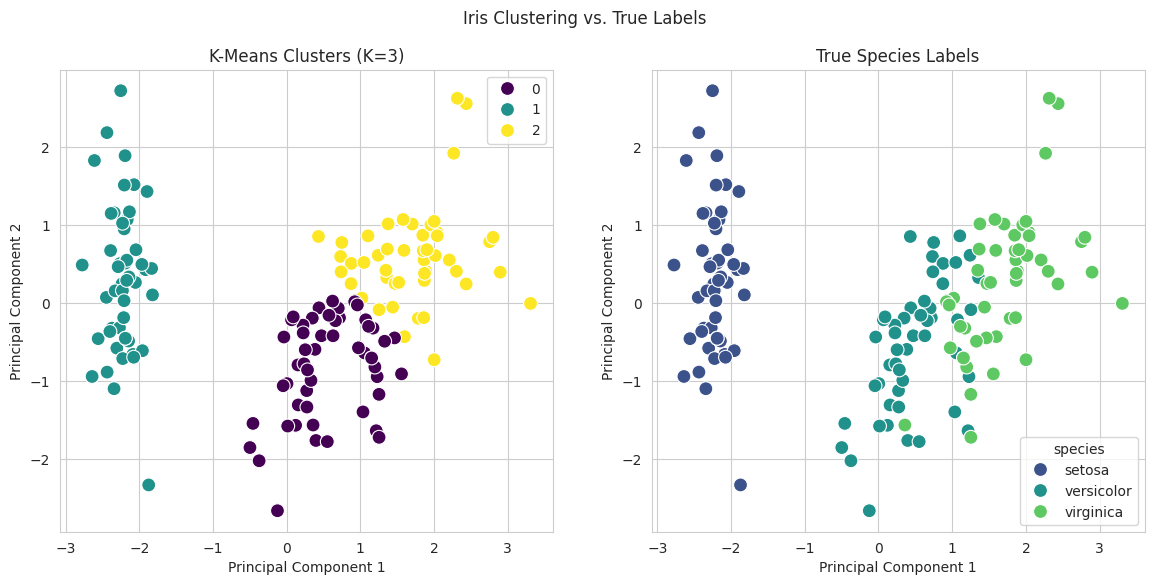



--- Task B: K-Means Clustering on Wine Dataset ---

Loading data from: /content/drive/My Drive/Unit06 wine.csv
Wine dataset loaded successfully!
   Wine  Alcohol  Malic.acid   Ash   Acl   Mg  Phenols  Flavanoids  \
0     1    14.23        1.71  2.43  15.6  127     2.80        3.06   
1     1    13.20        1.78  2.14  11.2  100     2.65        2.76   
2     1    13.16        2.36  2.67  18.6  101     2.80        3.24   
3     1    14.37        1.95  2.50  16.8  113     3.85        3.49   
4     1    13.24        2.59  2.87  21.0  118     2.80        2.69   

   Nonflavanoid.phenols  Proanth  Color.int   Hue    OD  Proline  
0                  0.28     2.29       5.64  1.04  3.92     1065  
1                  0.26     1.28       4.38  1.05  3.40     1050  
2                  0.30     2.81       5.68  1.03  3.17     1185  
3                  0.24     2.18       7.80  0.86  3.45     1480  
4                  0.39     1.82       4.32  1.04  2.93      735  

Data pre-processed and scaled

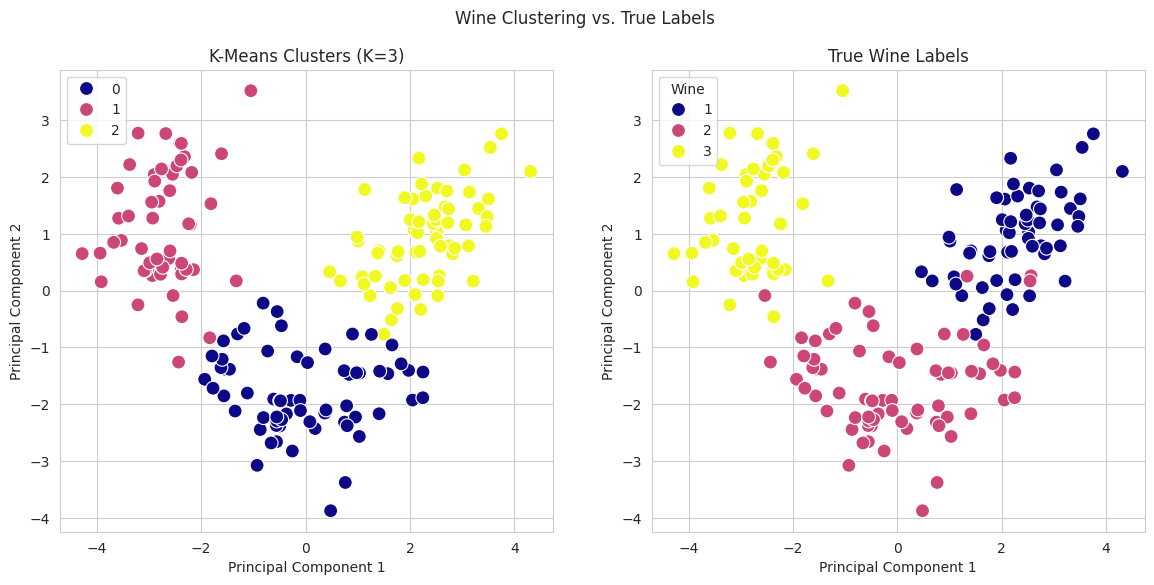



--- Task C: K-Means Clustering on WeatherAUS Dataset ---

Loading data from: /content/drive/My Drive/Unit06 weatherAUS.csv
Weather dataset loaded successfully!
Original shape: (145460, 14)
Shape after dropping NaNs: (120494, 8)

Data pre-processed and scaled.


In [ ]:
# @title Phase 1: Setup and Library Imports
# -------------------------------------------
# Import all necessary libraries for the analysis.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.decomposition import PCA

# Set some display options for pandas and matplotlib for better visualization
%matplotlib inline
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')


# --- Mount Google Drive ---
# This allows the notebook to access files stored in your Google Drive.
print("Mounting Google Drive...")
drive.mount('/content/drive', force_remount=True)


# @title Task A: Iris Data Clustering
# ------------------------------------
print("\n--- Task A: K-Means Clustering on Iris Dataset ---")

# --- Load the Iris Data ---
iris_file_path = '/content/drive/My Drive/Unit06 iris.csv'
try:
    print(f"\nLoading data from: {iris_file_path}")
    df_iris = pd.read_csv(iris_file_path)
    print("Iris dataset loaded successfully!")
    print(df_iris.head())
except FileNotFoundError:
    print(f"ERROR: File not found at '{iris_file_path}'. Please check the path and filename.")
    df_iris = None

if df_iris is not None:
    # --- Pre-process the Data ---
    # For K-Means, we only need the numerical features.
    # We will drop the 'species' column.
    # We'll save the 'species' column to compare our results later.
    X_iris = df_iris.drop('species', axis=1)
    y_iris_true = df_iris['species']

    # Scale the data so that all features have equal weight.
    scaler = StandardScaler()
    X_iris_scaled = scaler.fit_transform(X_iris)

    print("\nData pre-processed and scaled.")

    # --- Perform K-Means Clustering with K=3 ---
    kmeans_iris = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans_iris.fit(X_iris_scaled)
    iris_clusters = kmeans_iris.labels_

    print("\nK-Means clustering complete (K=3).")

    # --- Evaluate the Clustering ---
    ari_iris = adjusted_rand_score(y_iris_true, iris_clusters)
    print(f"\nAdjusted Rand Score (ARI) for K=3: {ari_iris:.3f}")

    # Create a cross-tabulation to see how clusters map to species
    ct_iris = pd.crosstab(y_iris_true, iris_clusters)
    print("\nCrosstab of True Species vs. K-Means Clusters:")
    print(ct_iris)

    # --- Visualize the Clusters ---
    # To visualize in 2D, we can use PCA to reduce the dimensions from 4 to 2.
    pca = PCA(n_components=2)
    X_iris_pca = pca.fit_transform(X_iris_scaled)

    plt.figure(figsize=(14, 6))

    # Plot 1: K-Means Clusters
    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_iris_pca[:, 0], y=X_iris_pca[:, 1], hue=iris_clusters, palette='viridis', s=100)
    plt.title('K-Means Clusters (K=3)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    # Plot 2: True Species Labels
    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_iris_pca[:, 0], y=X_iris_pca[:, 1], hue=y_iris_true, palette='viridis', s=100)
    plt.title('True Species Labels')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.suptitle('Iris Clustering vs. True Labels')
    plt.show()


# @title Task B: Wine Data Clustering
# ------------------------------------
print("\n\n--- Task B: K-Means Clustering on Wine Dataset ---")

# --- Load the Wine Data ---
wine_file_path = '/content/drive/My Drive/Unit06 wine.csv'
try:
    print(f"\nLoading data from: {wine_file_path}")
    df_wine = pd.read_csv(wine_file_path)
    print("Wine dataset loaded successfully!")
    print(df_wine.head())
except FileNotFoundError:
    print(f"ERROR: File not found at '{wine_file_path}'. Please check the path and filename.")
    df_wine = None

if df_wine is not None:
    # --- Pre-process the Data ---
    # The first column 'Wine' is our target label.
    X_wine = df_wine.drop('Wine', axis=1)
    y_wine_true = df_wine['Wine']

    scaler_wine = StandardScaler()
    X_wine_scaled = scaler_wine.fit_transform(X_wine)

    print("\nData pre-processed and scaled.")

    # --- Perform K-Means Clustering with K=3 ---
    kmeans_wine = KMeans(n_clusters=3, random_state=42, n_init=10)
    kmeans_wine.fit(X_wine_scaled)
    wine_clusters = kmeans_wine.labels_

    print("\nK-Means clustering complete (K=3).")

    # --- Evaluate the Clustering ---
    ari_wine = adjusted_rand_score(y_wine_true, wine_clusters)
    print(f"\nAdjusted Rand Score (ARI) for K=3: {ari_wine:.3f}")

    ct_wine = pd.crosstab(y_wine_true, wine_clusters)
    print("\nCrosstab of True Wine Types vs. K-Means Clusters:")
    print(ct_wine)

    # --- Visualize the Clusters ---
    pca_wine = PCA(n_components=2)
    X_wine_pca = pca_wine.fit_transform(X_wine_scaled)

    plt.figure(figsize=(14, 6))

    plt.subplot(1, 2, 1)
    sns.scatterplot(x=X_wine_pca[:, 0], y=X_wine_pca[:, 1], hue=wine_clusters, palette='plasma', s=100)
    plt.title('K-Means Clusters (K=3)')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.subplot(1, 2, 2)
    sns.scatterplot(x=X_wine_pca[:, 0], y=X_wine_pca[:, 1], hue=y_wine_true, palette='plasma', s=100)
    plt.title('True Wine Labels')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')

    plt.suptitle('Wine Clustering vs. True Labels')
    plt.show()


# @title Task C: WeatherAUS Data Clustering
# ------------------------------------------
print("\n\n--- Task C: K-Means Clustering on WeatherAUS Dataset ---")

# --- Load the Weather Data ---
weather_file_path = '/content/drive/My Drive/Unit06 weatherAUS.csv'
try:
    print(f"\nLoading data from: {weather_file_path}")
    df_weather = pd.read_csv(weather_file_path)
    print("Weather dataset loaded successfully!")
    print(f"Original shape: {df_weather.shape}")
except FileNotFoundError:
    print(f"ERROR: File not found at '{weather_file_path}'. Please check the path and filename.")
    df_weather = None

if df_weather is not None:
    # --- Pre-process the Data ---
    features_to_use = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm']
    df_weather_subset = df_weather[features_to_use].copy()

    # Drop rows with missing values in our selected columns for simplicity
    df_weather_subset.dropna(inplace=True)
    print(f"Shape after dropping NaNs: {df_weather_subset.shape}")

    # Scale the data
    scaler_weather = StandardScaler()
    X_weather_scaled = scaler_weather.fit_transform(df_weather_subset)

    print("\nData pre-processed and scaled.")

    # --- Perform K-Means for a range of K ---
    # We will use PCA to visualize, focusing on the two most important features from our subset.
    pca_weather = PCA(n_components=2)
    X_weather_pca = pca_weather.fit_transform(X_weather_scaled)

    fig, axes = plt.subplots(2, 3, figsize=(20, 12))
    axes = axes.flatten()

    for i, k in enumerate(range(2, 7)):
        kmeans_weather = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans_weather.fit(X_weather_scaled)
        weather_clusters = kmeans_weather.labels_

        # Calculate Silhouette Score (a measure of how well-defined clusters are)
        silhouette_avg = silhouette_score(X_weather_scaled, weather_clusters)

        # Visualize the clusters
        sns.scatterplot(x=X_weather_pca[:, 0], y=X_weather_pca[:, 1], hue=weather_clusters, palette='cubehelix', ax=axes[i], legend=None)
        axes[i].set_title(f'K = {k}\nSilhouette Score: {silhouette_avg:.3f}')
        axes[i].set_xlabel('Principal Component 1')
        axes[i].set_ylabel('Principal Component 2')

    # Hide any unused subplots
    for i in range(len(range(2, 7)), len(axes)):
        axes[i].set_visible(False)

    plt.suptitle('Weather Data Clustering for Different Values of K')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

